##Programming 1 - Assignment 4
######Your name(s):Andrew Harper, Andrew Singh


---



The file Toyota5.csv includes data for 1000 used Toyota Corollas, including their prices and specification information:
*   Price (in dollars)
*   Age (in months)
*   Mileage
*   Horse_Power
*   Metallic_Color (1=yes, 0=no)
*   Automatic (1=yes, 0=no)
*   CC (cylinder volume)
*   Doors
*   Weight (in kg)
*   Fuel Type (diesel, petrol, CNG)

##### Load "Toyota4.csv" and save it as carsData. Load any packages that you may use for this assignment

In [11]:
carsData = read.csv("Toyota4.csv")

library(tidyverse)

install.packages("stargazer")
library(stargazer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("stargazer"):
“installation of package ‘stargazer’ had non-zero exit status”


#####Q1: Identify the variable(s) with missing values.Locate and replace those values with the mean of non-missing values.






In [12]:
# Identify the variable(s) with missing values
missing_vars <- colnames(carsData)[colSums(is.na(carsData)) > 0]
print(paste("Variables with missing values:", paste(missing_vars, collapse = ", ")))

# Replace missing values with the mean of non-missing values
for (var in missing_vars) {
  carsData[[var]][is.na(carsData[[var]])] <- mean(carsData[[var]], na.rm = TRUE)
}

# Verify that there are no more missing values
sum(is.na(carsData))

[1] "Variables with missing values: Mileage"


[1] 0



---


#####Q2: Summarize the fuel type variable using a frequency table and a plot. Return the name of the most common fuel type category.


   CNG Diesel Petrol 
    14    119    867 
[1] "The most common fuel type category is: Petrol"


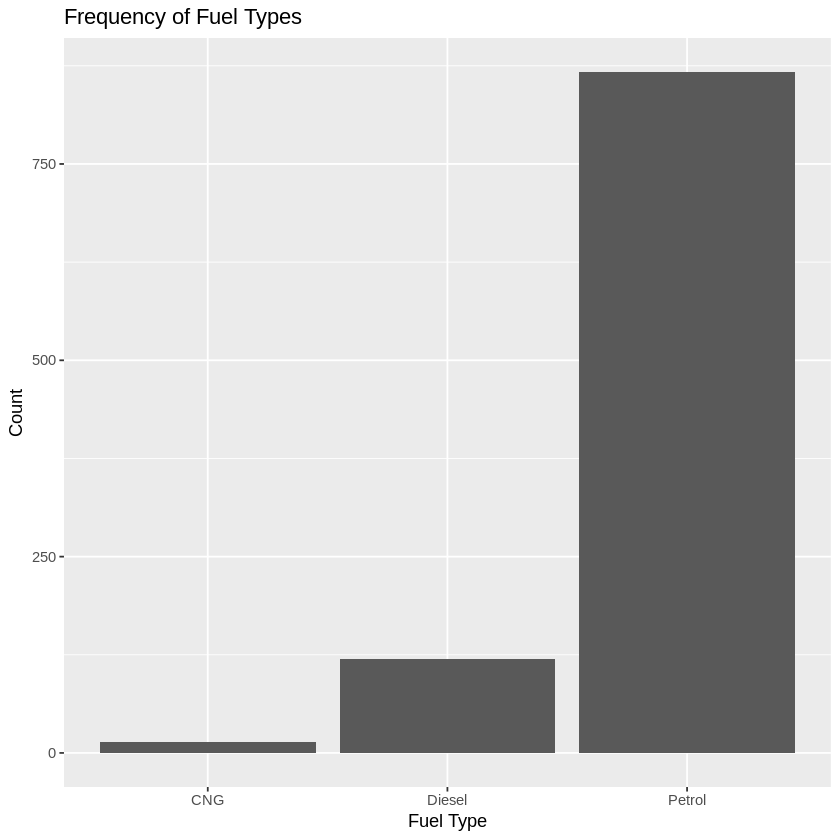

In [3]:
# Summarize the fuel type variable using a frequency table
fuel_type_summary <- table(carsData$Fuel_Type)
print(fuel_type_summary)

# Plot the fuel type variable
ggplot(carsData, aes(x = Fuel_Type)) +
  geom_bar() +
  labs(title = "Frequency of Fuel Types", x = "Fuel Type", y = "Count")

# Identify the most common fuel type category
most_common_fuel_type <- names(fuel_type_summary)[which.max(fuel_type_summary)]
print(paste("The most common fuel type category is:", most_common_fuel_type))




---


#####Q3: Create a boxplot that compares the distribution of price across different fuel types. Also, write a code that calculates the average price for each of these fuel type categories. Which fuel category has the highest average price? (write a code that returns both the name and the average price of this category)




# A tibble: 3 × 2
  Fuel_Type Average_Price
  <chr>             <dbl>
1 CNG              10071.
2 Diesel           12387.
3 Petrol           11817.
[1] "The fuel category with the highest average price is: Diesel with an average price of 12387.4453781513"


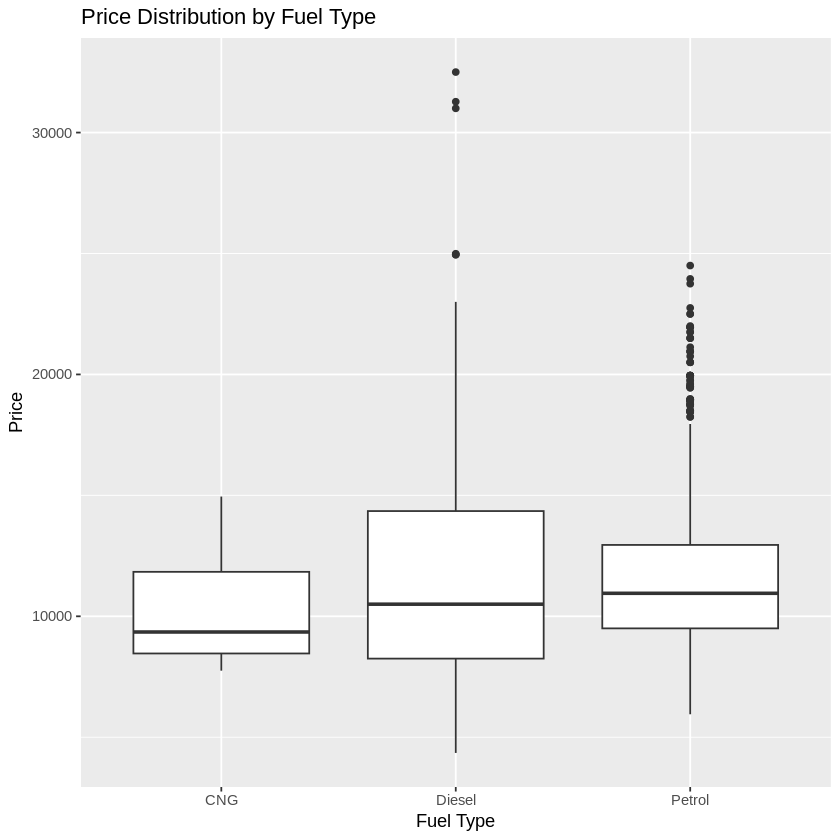

In [4]:
# Create a boxplot comparing the distribution of price across different fuel types
ggplot(carsData, aes(x = Fuel_Type, y = Price)) +
  geom_boxplot() +
  labs(title = "Price Distribution by Fuel Type", x = "Fuel Type", y = "Price")

# Calculate the average price for each fuel type category
average_price_by_fuel <- carsData %>%
  group_by(Fuel_Type) %>%
  summarize(Average_Price = mean(Price, na.rm = TRUE))

print(average_price_by_fuel)

# Identify the fuel category with the highest average price
highest_avg_price <- average_price_by_fuel %>%
  filter(Average_Price == max(Average_Price))

print(paste("The fuel category with the highest average price is:", highest_avg_price$Fuel_Type, "with an average price of", highest_avg_price$Average_Price))


---


#####Q4: Create two scatterplots: Price (y-axis) vs. Age (x-axis), Price (y-axis) vs. Mileage (x-axis). In an attempt to know which variable (Age or Mileage) is more strongly correlated with price, report the correlation coefficient for both.


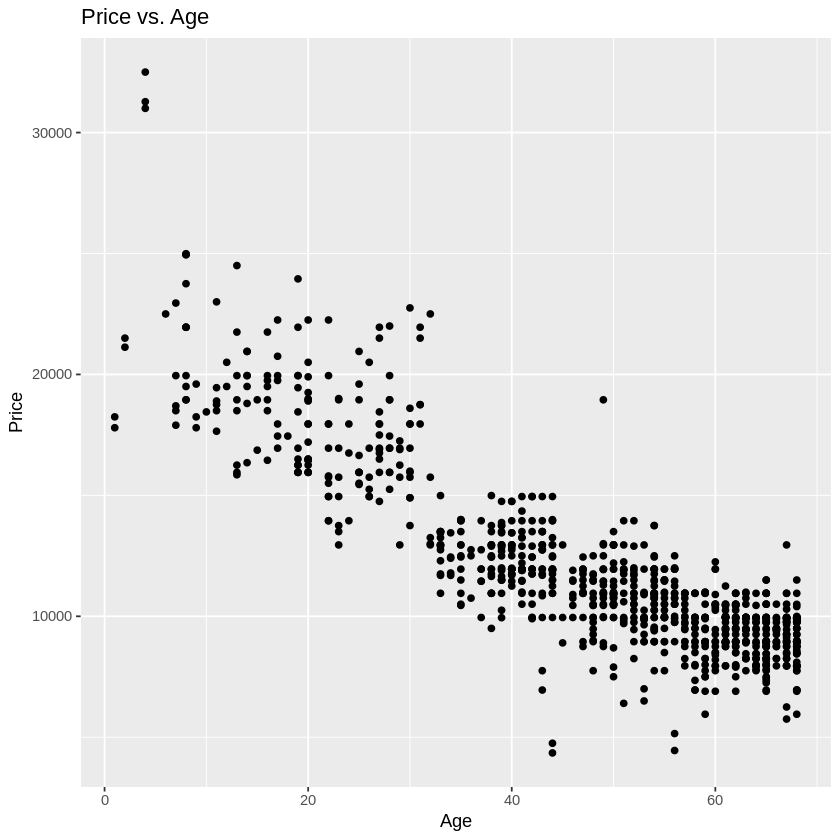

[1] "Correlation coefficient between Price and Age: -0.868083405620698"
[1] "Correlation coefficient between Price and Mileage: -0.594966760850109"


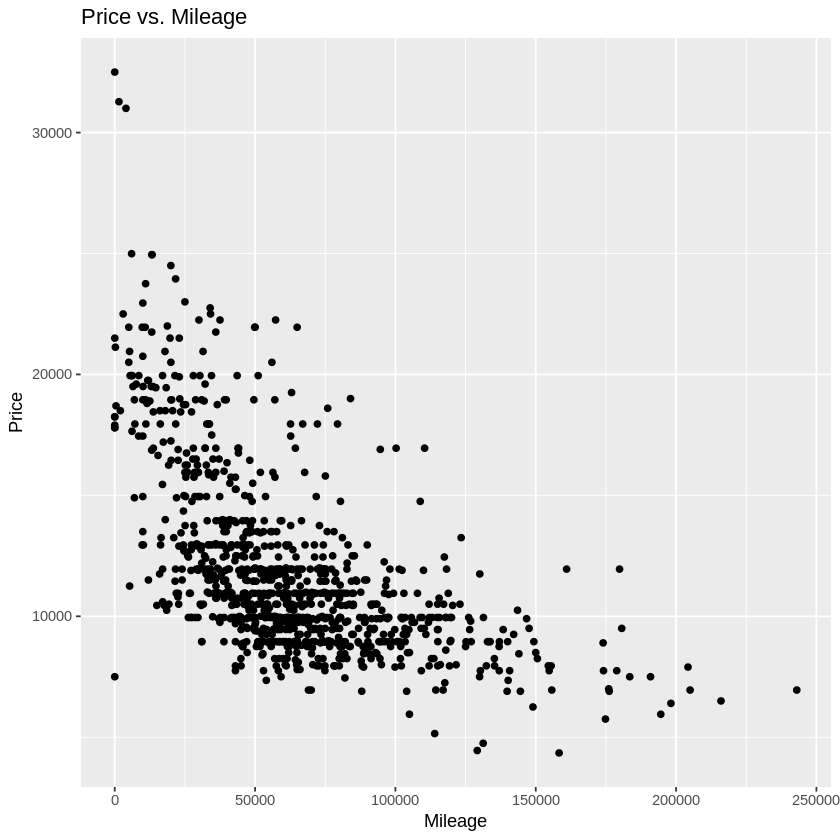

In [5]:
# Create scatterplot for Price vs. Age
ggplot(carsData, aes(x = Age, y = Price)) +
  geom_point() +
  labs(title = "Price vs. Age", x = "Age", y = "Price")

# Create scatterplot for Price vs. Mileage
ggplot(carsData, aes(x = Mileage, y = Price)) +
  geom_point() +
  labs(title = "Price vs. Mileage", x = "Mileage", y = "Price")

# Calculate the correlation coefficient for Price vs. Age
cor_price_age <- cor(carsData$Price, carsData$Age, use = "complete.obs")
print(paste("Correlation coefficient between Price and Age:", cor_price_age))

# Calculate the correlation coefficient for Price vs. Mileage
cor_price_mileage <- cor(carsData$Price, carsData$Mileage, use = "complete.obs")
print(paste("Correlation coefficient between Price and Mileage:", cor_price_mileage))



---


#####Q5: Detect and remove outliers in terms of Price using the z-score method (z > 3 or z < -3). Write a code to return the number of outliers and save the cleaned data as carsUpdated. Note: While there are various methods for detecting outliers, use the z-score approach for this exercise.


In [6]:
# Calculate the z-scores for the Price variable
carsData$z_score <- (carsData$Price - mean(carsData$Price, na.rm = TRUE)) / sd(carsData$Price, na.rm = TRUE)

# Identify outliers
outliers <- carsData %>% filter(abs(z_score) > 3)

# Count the number of outliers
num_outliers <- nrow(outliers)
print(paste("Number of outliers:", num_outliers))

# Remove outliers
carsUpdated <- carsData %>% filter(abs(z_score) <= 3)

# Drop the z_score column as it's no longer needed
carsUpdated <- carsUpdated %>% select(-z_score)

[1] "Number of outliers: 9"




---


#####Q6: Run a simple linear regression of price using age as the predictor. (use the updated dataset). Save the results as regAge. Write a code that returns the summary of the results.




In [7]:
# Run the simple linear regression
regAge <- lm(Price ~ Age, data = carsUpdated)

# Return the summary of the results
summary(regAge)



Call:
lm(formula = Price ~ Age, data = carsUpdated)

Residuals:
    Min      1Q  Median      3Q     Max 
-8186.1 -1025.7   -41.1   944.4  7747.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20664.58     169.54  121.88   <2e-16 ***
Age          -184.74       3.32  -55.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1706 on 989 degrees of freedom
Multiple R-squared:  0.7579,	Adjusted R-squared:  0.7577 
F-statistic:  3097 on 1 and 989 DF,  p-value: < 2.2e-16




---


#####Q7: Run a simple linear regression of price using mileage as the predictor. (use the updated dataset) Save the results as regMileage. Write a code that returns the summary of the results.



In [8]:
# Run the simple linear regression
regMileage <- lm(Price ~ Mileage, data = carsUpdated)

# Return the summary of the results
summary(regMileage)


Call:
lm(formula = Price ~ Mileage, data = carsUpdated)

Residuals:
    Min      1Q  Median      3Q     Max 
-7911.5 -2008.2  -524.2  1352.5 10331.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.541e+04  1.825e+02   84.43   <2e-16 ***
Mileage     -5.838e-02  2.525e-03  -23.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2794 on 989 degrees of freedom
Multiple R-squared:  0.3508,	Adjusted R-squared:  0.3501 
F-statistic: 534.4 on 1 and 989 DF,  p-value: < 2.2e-16




---


#####Q8: Run a multiple linear regression of price using both age and mileage as predictors. (use the updated dataset) Save the results as regBoth. Write a code that returns the summary of the results.

In [9]:
# Run the multiple linear regression
regBoth <- lm(Price ~ Age + Mileage, data = carsUpdated)

# Return the summary of the results
summary(regBoth)



Call:
lm(formula = Price ~ Age + Mileage, data = carsUpdated)

Residuals:
    Min      1Q  Median      3Q     Max 
-6519.9 -1005.6  -103.2   917.0  7572.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.079e+04  1.623e+02 128.132   <2e-16 ***
Age         -1.647e+02  3.754e+00 -43.886   <2e-16 ***
Mileage     -1.730e-02  1.744e-03  -9.922   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1628 on 988 degrees of freedom
Multiple R-squared:  0.7799,	Adjusted R-squared:  0.7794 
F-statistic:  1750 on 2 and 988 DF,  p-value: < 2.2e-16




---


#####Q9: Create a table that compares the three regression models in terms of residual standard error and adjusted r-squares. (Note: you can do so by building a dataframe of the desired outputs or using stargazer function. In either case, make sure reach row/column is labeled accordingly.)



In [10]:
# Generate the comparison table
stargazer(regAge, regMileage, regBoth,
          type = "text",
          title = "Comparison of Regression Models",
          dep.var.labels = "Price",
          covariate.labels = c("Age", "Mileage", "Intercept"),
          keep.stat = c("n", "rsq", "adj.rsq", "ser"),
          column.labels = c("Simple Linear Regresssion Age", "Simple Linear Regression Mileage", "Multiple Linear Regression"))



Comparison of Regression Models
                                                       Dependent variable:                                   
                    -----------------------------------------------------------------------------------------
                                                              Price                                          
                    Simple Linear Regresssion Age Simple Linear Regression Mileage Multiple Linear Regression
                                 (1)                            (2)                           (3)            
-------------------------------------------------------------------------------------------------------------
Age                          -184.738***                                                  -164.746***        
                               (3.320)                                                      (3.754)          
                                                                                       